In [2]:
import pandas as pd

# process labels

In [3]:
pip install xlrd==1.2.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [111]:
labels = pd.read_excel('~/data/scivias_original_labels.xlsx')
labels.head()

,",studyid,disease_en,sct_term,subdiscipline"
0,"0,KK-SCIVIAS-00003,Chronic ulcerative colitis,..."
1,"1,KK-SCIVIAS-00004,Crohn's disease,34000006 | ..."
2,"2,KK-SCIVIAS-00005,Crohn's disease,34000006 | ..."
3,"3,KK-SCIVIAS-00006,Conjunctivitis,9826008 | Co..."
4,"4,KK-SCIVIAS-00006,PFAPA syndrome,717231003 | ..."


In [112]:
cols = labels.columns.values[0].split(',')
cols

['', 'studyid', 'disease_en', 'sct_term', 'subdiscipline']

In [117]:
def split_row(row):
    data_arr = row.values[0].split(',')
    res = [data_arr[1]]
    
    dis_term = ','.join(data_arr[2:-1])
    try:
        sct_term = ast.literal_eval(dis_term)[1]
    except:
        sct_term = ','.join(dis_term.split(',')[1:])
    sct_term = sct_term.replace('(disorder)', '')
    sct_term = sct_term.split('|')[1].strip()
    
    res += [sct_term, data_arr[-1]]
    
    return res


In [118]:
labels.iloc[32].values[0]

'32,KK-SCIVIAS-00033,"Juvenile idiopathic arthritis, oligoarthritis","410798004 | Juvenile idiopathic arthritis, oligoarthritis (disorder) |",immunology/rheumatology'

In [119]:
split_row(labels.iloc[32])

['KK-SCIVIAS-00033',
 'Juvenile idiopathic arthritis, oligoarthritis',
 'immunology/rheumatology']

In [120]:
data = []
for index, row in labels.iterrows():
    try:
        data_arr = split_row(row)
    except:
        print('error', row.values[0])
    if len(data_arr) !=3:
        print(data_arr)
    data.append(data_arr)

In [121]:
cols = ['studyid', 'disease_en','subdiscipline']
labels = pd.DataFrame(data=data, columns = cols)
labels.head()

,studyid,disease_en,subdiscipline
0,KK-SCIVIAS-00003,Chronic ulcerative colitis,gastroenterology
1,KK-SCIVIAS-00004,Crohn's disease,gastroenterology
2,KK-SCIVIAS-00005,Crohn's disease,gastroenterology
3,KK-SCIVIAS-00006,Conjunctivitis,immunology/rheumatology
4,KK-SCIVIAS-00006,Periodic fever and aphthous stomatitis with ph...,immunology/rheumatology


In [122]:
labels.disease_en.value_counts()

Well child (finding)                                              387
Celiac disease                                                    119
Cystic fibrosis                                                   113
Crohn's disease                                                    50
Diabetes mellitus type 1                                           46
                                                                 ... 
XXXY syndrome                                                       1
Congenital hypoplasia of left kidney                                1
Middle cerebral artery syndrome                                     1
Roifman syndrome                                                    1
Mixed obstructive and restrictive ventilatory defect (finding)      1
Name: disease_en, Length: 684, dtype: int64

In [127]:
ls ~/data

IDRiD_data/  SCIAVIAS/        scivias_original_labels.xlsx
OCTID/       oct_weights.pth  sct_labels.csv


In [128]:
labels.to_csv('~/data/sct_labels.csv')

# load labels

In [4]:
labels = pd.read_csv('~/data/sct_labels.csv', index_col=0)
labels.head()

,studyid,disease_en,subdiscipline
0,KK-SCIVIAS-00003,Chronic ulcerative colitis,gastroenterology
1,KK-SCIVIAS-00004,Crohn's disease,gastroenterology
2,KK-SCIVIAS-00005,Crohn's disease,gastroenterology
3,KK-SCIVIAS-00006,Conjunctivitis,immunology/rheumatology
4,KK-SCIVIAS-00006,Periodic fever and aphthous stomatitis with ph...,immunology/rheumatology


# load meta

In [35]:
meta = pd.read_csv('~/codes/data_exploration/files/opt.csv', index_col=0)
meta.head()

,Filename,PatientID,SOPClassUID,Modality,Laterality
1,1.2.276.0.75.2.2.42.50126425987.20231129154423...,KK-SCIVIAS-03474,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
16,1.2.276.0.75.2.2.42.50126425987.20220412143853...,KK-SCIVIAS-01172,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
21,1.2.276.0.75.2.2.42.50126425987.20220224114749...,KK-SCIVIAS-01048,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
29,1.2.276.0.75.2.2.42.50126425987.20220517150138...,KK-SCIVIAS-01354,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,R
42,1.2.276.0.75.2.2.42.50126425987.20240730100425...,KK-SCIVIAS-08103,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L


In [36]:
len(meta)

4576

In [37]:
# meta['studyid'] = meta['PatientName'].str.split('^').str[0]
# meta.head()

meta = meta.rename(columns = {'PatientID': 'studyid'})
meta.head()

,Filename,studyid,SOPClassUID,Modality,Laterality
1,1.2.276.0.75.2.2.42.50126425987.20231129154423...,KK-SCIVIAS-03474,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
16,1.2.276.0.75.2.2.42.50126425987.20220412143853...,KK-SCIVIAS-01172,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
21,1.2.276.0.75.2.2.42.50126425987.20220224114749...,KK-SCIVIAS-01048,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
29,1.2.276.0.75.2.2.42.50126425987.20220517150138...,KK-SCIVIAS-01354,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,R
42,1.2.276.0.75.2.2.42.50126425987.20240730100425...,KK-SCIVIAS-08103,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L


In [38]:
joined = pd.merge(labels, meta, on='studyid', how='inner')
joined.head()

,studyid,disease_en,subdiscipline,Filename,SOPClassUID,Modality,Laterality
0,KK-SCIVIAS-00004,Crohn's disease,gastroenterology,1.2.276.0.75.2.2.42.50126425987.20210118121227...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,R
1,KK-SCIVIAS-00004,Crohn's disease,gastroenterology,1.2.276.0.75.2.2.42.50126425987.20210118121511...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
2,KK-SCIVIAS-00005,Crohn's disease,gastroenterology,1.2.276.0.75.2.2.42.50126425987.20210122124555...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,R
3,KK-SCIVIAS-00005,Crohn's disease,gastroenterology,1.2.276.0.75.2.2.42.50126425987.20210122124939...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,L
4,KK-SCIVIAS-00006,Conjunctivitis,immunology/rheumatology,1.2.276.0.75.2.2.42.50126425987.20210128123911...,1.2.840.10008.5.1.4.1.1.77.1.5.4,OPT,R


In [39]:
len(joined), len(meta), len(labels), joined.Filename.nunique()

(4527, 4576, 2797, 4115)

In [40]:
joined = joined.drop_duplicates(subset='Filename', keep='first')
len(joined)

4115

# evaluate labels

In [138]:
len(labels), labels.studyid.nunique()

(2797, 2482)

In [139]:
# Group by 'studyid' and aggregate values
result = (
    labels.groupby('studyid')
    .filter(lambda x: len(x) > 1)  # Filter groups with more than 1 row
    .groupby('studyid')
    .agg({
        'disease_en': list,  # Create a list of all values for 'value1'
    })
    .reset_index()  # Optional: Reset index for a clean DataFrame
)
result

,studyid,disease_en
0,KK-SCIVIAS-00006,"[Conjunctivitis, Periodic fever and aphthous s..."
1,KK-SCIVIAS-00007,[Chronic nonbacterial osteomyelitis/chronic re...
2,KK-SCIVIAS-00008,[Chronic nonbacterial osteomyelitis/chronic re...
3,KK-SCIVIAS-00012,"[Punctate keratitis, Recurrent aphthous stomat..."
4,KK-SCIVIAS-00014,"[Fasciitis, Panniculitis]"
...,...,...
229,KK-SCIVIAS-03632,[Acute glomerulonephritis due to and following...
230,KK-SCIVIAS-03634,"[Arthritis, Streptococcal infectious disease]"
231,KK-SCIVIAS-03656,"[Depressive disorder, Dissociative motor disor..."
232,KK-SCIVIAS-03657,[Autosomal dominant intermediate Charcot-Marie...


# split

In [41]:
import os
os.chdir('/data/core-kind/fatemeh/codes/data_exploration')

In [42]:
import importlib
import split
importlib.reload(split)
from split import *

In [43]:
df = joined
stratify_col = 'disease_en'
label_counts = df[stratify_col].value_counts()

In [44]:
valid_labels = label_counts[label_counts >= 30].index

In [45]:
df[df[stratify_col].isin(valid_labels)].disease_en.value_counts()

Well child (finding)                                                                           564
Cystic fibrosis                                                                                268
Celiac disease                                                                                 196
Crohn's disease                                                                                 85
Adrenogenital disorder                                                                          79
Diabetes mellitus type 1                                                                        78
Chronic ulcerative colitis                                                                      63
Hereditary factor VIII deficiency disease                                                       62
Disorder of immune function                                                                     57
Functional abdominal pain syndrome                                                              55
Growth hor

In [46]:
split_and_save_filtered(joined, 'disease_en', '/data/core-kind/fatemeh/data/opt/splits')

Index(['Well child (finding)', 'Cystic fibrosis', 'Celiac disease',
       'Crohn's disease', 'Adrenogenital disorder', 'Diabetes mellitus type 1',
       'Chronic ulcerative colitis',
       'Hereditary factor VIII deficiency disease',
       'Disorder of immune function', 'Functional abdominal pain syndrome',
       'Growth hormone deficiency', 'Familial Mediterranean fever', 'Asthma',
       'Chronic post-COVID-19 syndrome', 'Short stature disorder',
       'Periodic fever and aphthous stomatitis with pharyngitis and cervical lymphadenitis syndrome',
       'Factor VII deficiency', 'Prader-Willi syndrome',
       'Juvenile idiopathic arthritis, oligoarthritis',
       'Hereditary von Willebrand disease type 1'],
      dtype='object')
Filtered dataset has 1928 samples and 20 valid labels.
Data saved successfully to /data/core-kind/fatemeh/data/opt/splits:
- Train set: 1349 samples
- Validation set: 289 samples
- Test set: 290 samples


In [47]:
input_folder = '/data/core-kind/fatemeh/data/opt/splits'
# Initialize a dictionary to hold counts for each split
split_counts = {}

# Loop through the CSV files in the folder
for file_name in os.listdir(input_folder):
    if file_name.endswith(".csv"):
        split_name = file_name.replace(".csv", "")  # e.g., 'train', 'test', 'val'
        file_path = os.path.join(input_folder, file_name)
        
        # Read the CSV file
        data = pd.read_csv(file_path)
        
        # Assuming 'class' is the column containing class labels
        counts = data['disease_en'].value_counts()
        split_counts[split_name] = counts

# Combine all splits into a DataFrame for plotting
combined_counts = pd.DataFrame(split_counts).fillna(0).astype(int)


In [48]:
combined_counts

,train,val,test
Adrenogenital disorder,55,12,12
Asthma,32,7,7
Celiac disease,137,29,30
Chronic post-COVID-19 syndrome,32,7,7
Chronic ulcerative colitis,44,9,10
Crohn's disease,59,13,13
Cystic fibrosis,188,40,40
Diabetes mellitus type 1,55,11,12
Disorder of immune function,40,8,9
Factor VII deficiency,29,7,6


In [49]:
# Reshape the DataFrame for Seaborn
combined_counts_reset = combined_counts.reset_index().melt(id_vars='index', var_name='Split', value_name='Count')
combined_counts_reset.rename(columns={'index': 'Class'}, inplace=True)


In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

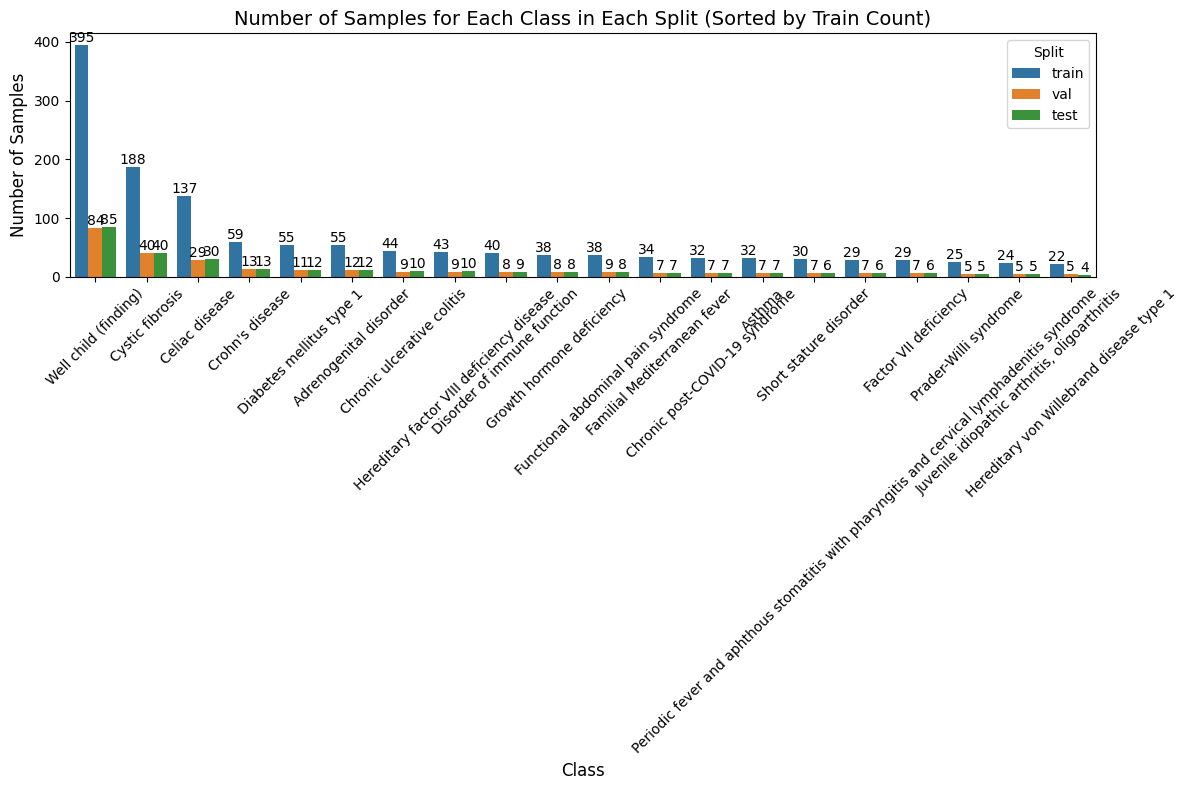

In [51]:
# Sort by 'train' count
train_sorted = combined_counts['train'].sort_values(ascending=False).index
combined_counts_reset['Class'] = pd.Categorical(combined_counts_reset['Class'], categories=train_sorted, ordered=True)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=combined_counts_reset, x='Class', y='Count', hue='Split', dodge=True)

# Add the count on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Customize plot
plt.title("Number of Samples for Each Class in Each Split (Sorted by Train Count)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Split", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

plot_class_distribution('./files/splits')

In [33]:
joined.Filename.nunique()

4115

# organiza data

In [215]:
import importlib
import split
importlib.reload(split)
from split import *

In [52]:
organize_images('/data/core-kind/fatemeh/data/opt/splits/', '/data/core-kind/fatemeh/data/opt', '/data/core-kind/fatemeh/data/opt/organized')

Image organization complete.


# loss history

In [217]:
import matplotlib.pyplot as plt

def plot_loss_history(loss_history_dict):
    """
    Plots the training and validation loss over epochs.

    Args:
        loss_history_dict (dict): A dictionary with keys like 'train' and 'val',
                                  where each key contains a list of loss values.
                                  Example:
                                  {
                                      "train": [0.9, 0.8, 0.7],
                                      "val": [1.0, 0.9, 0.85]
                                  }

    Returns:
        None
    """
    # Check if the dictionary contains both 'train' and 'val' keys
    if not all(key in loss_history_dict for key in ['train', 'val']):
        raise ValueError("The dictionary must contain 'train' and 'val' keys.")

    # Extract loss histories
    train_loss = loss_history_dict['train']
    val_loss = loss_history_dict['val']

    # Generate the plot
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Train Loss', marker='o')
    plt.plot(val_loss, label='Validation Loss', marker='o')
    
    # Add labels, title, and legend
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training and Validation Loss over Epochs', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    
    # Display the plot
    plt.tight_layout()
    plt.show()


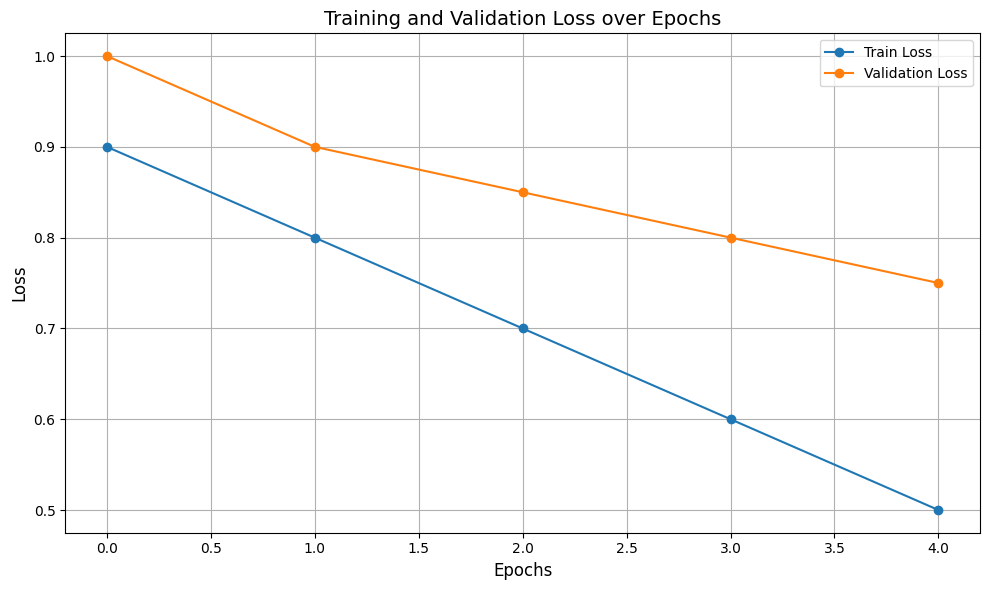

In [218]:
# Example loss history
loss_history = {
    "train": [0.9, 0.8, 0.7, 0.6, 0.5],
    "val": [1.0, 0.9, 0.85, 0.8, 0.75]
}

# Plot the loss
plot_loss_history(loss_history)
